# Existing and Schools New to the CEP program

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 
#plt.style.use('seaborn-poster')
#plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_context('poster',font_scale=1.2)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#constants

multiplier = 1.6

# combined Federal and NY State meal reimbursement rates
freeLunch = 3.2999
paidLunch = 0.4399
freeBreakfast = 2.1413
paidBreakfast = 0.2923

deltaLunchRate = freeLunch - paidLunch
deltaBreakfastRate = freeBreakfast - paidBreakfast 

t_min = 0.40 * multiplier

# reading in data
doeNew = pd.read_excel('data/Test Data for CEP Grouping.xlsx',sheetname="School Data",header=2)
doeNew.rename(columns={'Identified Student Count':'Identified'},inplace=True)

doeExist = pd.read_excel('data/Additional Test Data for CEP Grouping, Pre-Existing Groups.xlsx',
                           sheetname='School Data',header=4)
doeExist.rename(columns={'Count':'Identified'},inplace=True)

# pre existing threshold
doeExistGroup = pd.read_excel('data/Additional Test Data for CEP Grouping, Pre-Existing Groups.xlsx',
                             sheetname='Group Data',header=4)
doeExistGroup=doeExistGroup[['Group','Free']]
doeExistGroup.rename(columns={'Free':'oldThreshold'},inplace=True)

doeExist = doeExist.merge(doeExistGroup,how='left',on='Group')
doeExist.rename(columns={'Group':'oldGroup'},inplace=True)

# assume only schools with >0 enrollment can be part of cep program.
cepNew = doeNew[doeNew.Enrollment>0].copy()
cepNew.reset_index(inplace=True)

cepExist = doeExist[doeExist.Enrollment>0].copy()
cepExist.reset_index(inplace=True)


# define a few more columns that are useful.
# 'meal' is the max reimbursement of meals per year for each school.
# 'mealPerStudent' is the max per student.
# 'baseThreshold' is the threshold of the school if it is not grouped.

cepNew['meal'] = deltaLunchRate*cepNew['Lunch'] + deltaBreakfastRate*cepNew['Breakfast']
cepExist['meal'] = deltaLunchRate*cepExist['Lunch'] + deltaBreakfastRate*cepExist['Breakfast']

cepNew['paidMeal'] = paidLunch*cepNew['Lunch'] + paidBreakfast*cepNew['Breakfast']
cepExist['paidMeal'] = paidLunch*cepExist['Lunch'] + paidBreakfast*cepExist['Breakfast']

cepNew['mealPerStudent'] = cepNew['meal']/cepNew['Enrollment']
cepExist['mealPerStudent'] = cepExist['meal']/cepExist['Enrollment']

cepNew['baseThreshold'] = cepNew['Identified']/cepNew['Enrollment']*multiplier
cepExist['baseThreshold'] = cepExist['Identified']/cepExist['Enrollment']*multiplier

In [3]:
cepNew.head()

,index,School,Enrollment,Identified,Breakfast,Lunch,meal,paidMeal,mealPerStudent,baseThreshold
0,0,1019,268.0,114.0,13744.040323,32119.415317,117274.258362,18146.713784,437.590516,0.680597
1,1,1025,188.0,121.0,2660.633468,8954.467200,30529.287474,4716.773284,162.389827,1.029787
2,2,1034,348.0,262.0,18359.910484,39773.741129,147700.374114,22863.070557,424.426362,1.204598
3,3,1060,679.0,293.0,7340.885081,19996.654634,70763.728769,10942.269083,104.217568,0.690427
4,4,1061,291.0,99.0,4320.555242,25602.863216,81212.895439,12525.597826,279.082115,0.544330


In [4]:
cepExist.head()

,index,School,Enrollment,Identified,Breakfast,Lunch,oldGroup,oldThreshold,meal,paidMeal,mealPerStudent,baseThreshold
0,0,2169,80.00,60.60,28965,22739,A,0.999717,118589.825,18469.3556,1482.372813,1.212000
1,1,2809,42.75,26.25,10710,15957,A,0.999717,65439.810,10150.0173,1530.755789,0.982456
2,2,1895,34.20,19.80,5910,7773,A,0.999717,33158.370,5146.8357,969.542982,0.926316
3,3,3820,77.40,56.60,28373,28273,A,0.999717,133322.457,20730.7206,1722.512364,1.170026
4,4,11176,177.00,97.60,24687,26788,A,0.999717,122259.943,19000.0513,690.734141,0.882260


## Existing groups
There are 10 pre-existing groups

In [5]:
cepExist.groupby('oldGroup').count()[['School']]

,School
oldGroup,
A,428
B,158
C,8
D1,27
D2,6
D3,6
D4,17
D5,29
D6,4


In [6]:
cepExist.groupby('oldGroup').mean()[['oldThreshold']]

,oldThreshold
oldGroup,
A,0.999717
B,0.640014
C,0.804585
D1,0.943506
D2,0.819100
D3,0.773887
D4,0.865564
D5,0.757873
D6,0.836991


In [7]:
print 'number of students in existing CEP',cepExist.Enrollment.sum()
print 'number of students in potential CEP',cepNew.Enrollment.sum()
print 'total students =',cepExist.Enrollment.sum()+cepNew.Enrollment.sum()

number of students in existing CEP 310435.819712
number of students in potential CEP 726513.966002
total students = 1036949.78571


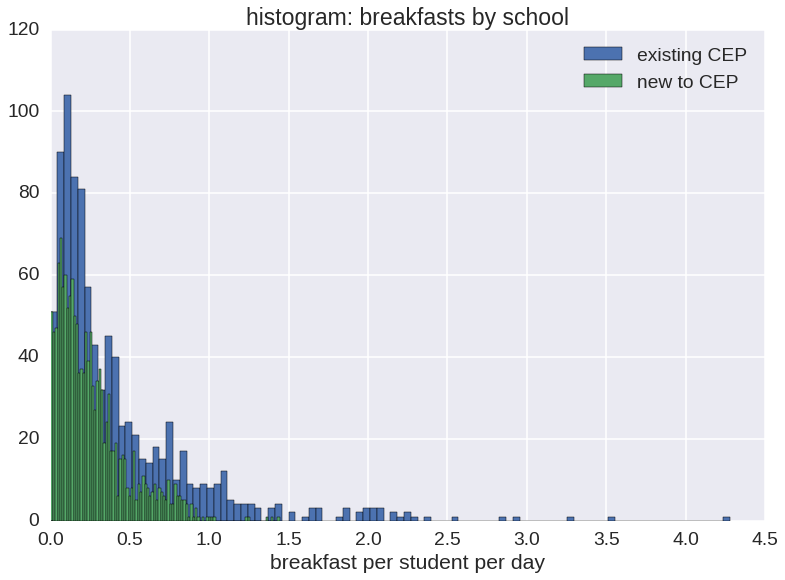

In [8]:
(cepExist.Breakfast/cepExist.Enrollment/180).hist(bins=100,label='existing CEP')
(cepNew.Breakfast/cepNew.Enrollment/180).hist(bins=100,label='new to CEP')
plt.legend()
plt.xlabel('breakfast per student per day')
plt.title('histogram: breakfasts by school')

In [9]:
print 'avg breakfasts per student in existing CEP schools',(cepExist.Breakfast/cepExist.Enrollment/180).mean()
print 'avg breakfasts per student in new to CEP schools',(cepNew.Breakfast/cepNew.Enrollment/180).mean()

avg breakfasts per student in existing CEP schools 0.426909045971
avg breakfasts per student in new to CEP schools 0.258292261185


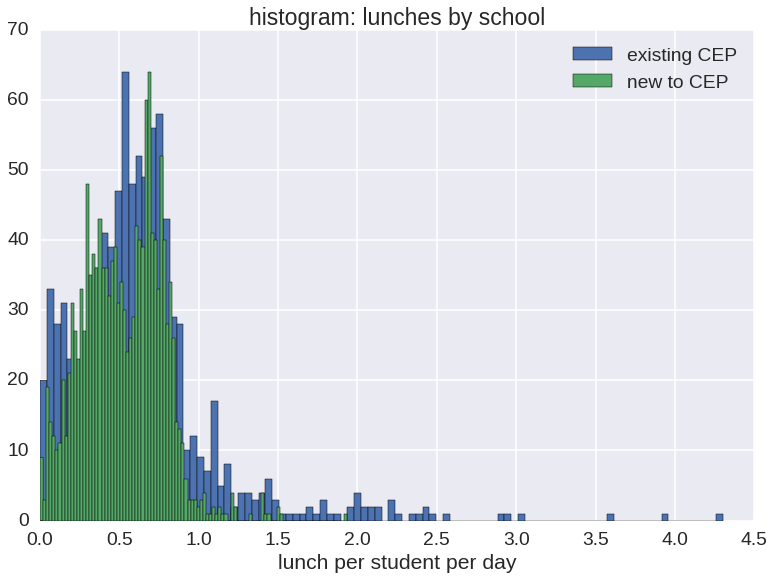

In [10]:
(cepExist.Lunch/cepExist.Enrollment/180).hist(bins=100,label='existing CEP')
(cepNew.Lunch/cepNew.Enrollment/180).hist(bins=100,label='new to CEP')
plt.legend()
plt.xlabel('lunch per student per day')
plt.title('histogram: lunches by school')

In [11]:
print 'avg lunches per student in existing CEP schools',(cepExist.Lunch/cepExist.Enrollment/180).mean()
print 'avg lunches per student in new to CEP schools',(cepNew.Lunch/cepNew.Enrollment/180).mean()

avg lunches per student in existing CEP schools 0.641687976906
avg lunches per student in new to CEP schools 0.526503517235


The projected meals for the existing CEP schools are higher on average than for schools new to CEP. So reimbursements from the new schools will likely be higher than projected.

## Calculating Reimbursements based on school groupings

In [12]:
# reimbursements over the base, this is the part that's dependant on groupings
def calcReimburse(cep,cost=0):
    ''' calculates and returns the total reimbursments (above base) for schools in a particlar grouping 
    Parameters:
    cep: dataframe where each row is a school. cep columns include: Identified, Enrollment, meal, group
    cost: cost = 0 (default) no cost to dropping schools from the program
          cost = 1 sets a high penalty for letting a group go below the min threshold'''
    
    # df - each row represents a group
    group_cep = cep.groupby('group')
    df = pd.DataFrame(index= group_cep.indices)

    df['threshold'] =  (group_cep['Identified'].sum()  / group_cep['Enrollment'].sum()) * multiplier
    df['meal']      =  group_cep['meal'].sum()
    
    # enforcing threshold rules:
    df['applied_threshold'] = df['threshold']
    df.loc[df['applied_threshold']  > 1, 'applied_threshold'] = 1
    df.loc[df['applied_threshold']  < t_min,'applied_threshold'] = 0 - cost*10**6

    df['reimbursed'] = df['applied_threshold'] * df['meal']
    
    return df.reimbursed.sum()

def setThreshold(cep):
    ''' calculates the threshold for each school based on its group
        cep columns: Enrollment, Identified'''
    for i in set(cep.group):
        df = cep[cep.group==i]
        cep.loc[cep.group == i,'threshold'] = df['Identified'].sum() / float(df['Enrollment'].sum()) * multiplier
    return 0

In [13]:
# reimbursements based on the old groupings
cepExist['oldReimburse'] = cepExist['oldThreshold']*cepExist['meal']
cepExist['oldReimburse'].sum()

117830076.13078761

In [14]:
188+117

305

## Calculate Optimal Solution using Monte Carlo -- Simulated Annealing
similar to stochastic hill climbing, but allows downwards steps as well

In [109]:
def simulated_annealing(cep, randomstart=True, seed=None,
                        ngroupstart=1,ngroups=10, Tmax=1, deltaT=0.1):
    
    startTime = time.time()
    rows=cep.shape[0]

    # start by grouping schools randomly
    if randomstart:
        np.random.seed(seed)
        cep.loc[:,'group'] = pd.Series(np.random.randint(0,ngroupstart,size=rows),
                                       index=cep.index)

    # store the results
    old = calcReimburse(cep)
    results=[old]

    # mc loop
    for T in np.arange(Tmax,0,-deltaT):
        for i in range(1000):
            df = cep.copy()
            
            # choose a random school and move it to a different random group
            df.loc[np.random.randint(0,rows),'group'] = np.random.randint(0,ngroups)
                                                                                   
            # calculate the reimbursement
            new = calcReimburse(df,cost=1)
            step = new - old                                                                           
            
            #keep move if reimbursement increases
            if (step > 0):
                old=new
                cep.loc[:,'group'] = df.group
                results.append(new)
                
            #maybe keep move if reimbursement decreases, depending on how much
            elif (np.random.uniform() < np.exp(step/T)):
                old=new
                cep.loc[:,'group'] = df.group
                results.append(new)

    cep = regroup(cep)
    setThreshold(cep)
    final = calcReimburse(cep)
    results.append(final)
    print final
    print 'time in h', (time.time()-startTime)/60.0/60.0
    return results,cep


def regroup(cep):
    '''if cep has multiple thresholds within one percent of each other, this 
    combines them'''
    setThreshold(cep)
    tlist = cep.groupby(cep.threshold.apply(lambda x: round(x,2))).groups.keys()
    for i,t in enumerate(tlist):
        cep.loc[cep.threshold.apply(lambda x:round(x,2))==t,'group']=i
    setThreshold(cep)
    return cep


In [122]:
def sa_ensemble(cep,trials=10,ngroupstart=1,ngroups=10,Tmax=1,deltaT=.1):
    cepbunch=[]
    final=[]
    for i in range(trials):
        sa,cep = simulated_annealing(cep,ngroupstart=ngroupstart,
                                     ngroups=ngroups,Tmax=Tmax,deltaT=deltaT)
        final.append(sa[-1])
        cepbunch.append(cep.copy())
    max_reimb = max(final)
    max_index = final.index(max_reimb)
    return cepbunch[max_index]


In [19]:
#combine all schools, exisiting and new
cep = pd.concat([cepExist,cepNew],ignore_index=True)
cep.head()

,Breakfast,Enrollment,Identified,Lunch,School,baseThreshold,group,index,meal,mealPerStudent,oldGroup,oldReimburse,oldThreshold,paidMeal,threshold
0,28965.0,80.00,60.60,22739.0,2169,1.212000,NaN,0,118589.825,1482.372813,A,118556.296491,0.999717,18469.3556,NaN
1,10710.0,42.75,26.25,15957.0,2809,0.982456,NaN,1,65439.810,1530.755789,A,65421.308419,0.999717,10150.0173,NaN
2,5910.0,34.20,19.80,7773.0,1895,0.926316,NaN,2,33158.370,969.542982,A,33148.995244,0.999717,5146.8357,NaN
3,28373.0,77.40,56.60,28273.0,3820,1.170026,NaN,3,133322.457,1722.512364,A,133284.763182,0.999717,20730.7206,NaN
4,24687.0,177.00,97.60,26788.0,11176,0.882260,NaN,4,122259.943,690.734141,A,122225.376850,0.999717,19000.0513,NaN


### Optimize the new schools to CEP (no previous groupings)

In [20]:
sa, cepNew = simulated_annealing(cepNew,Tmax=1,deltaT=.01)

187902597.236
time in h 0.123831949433


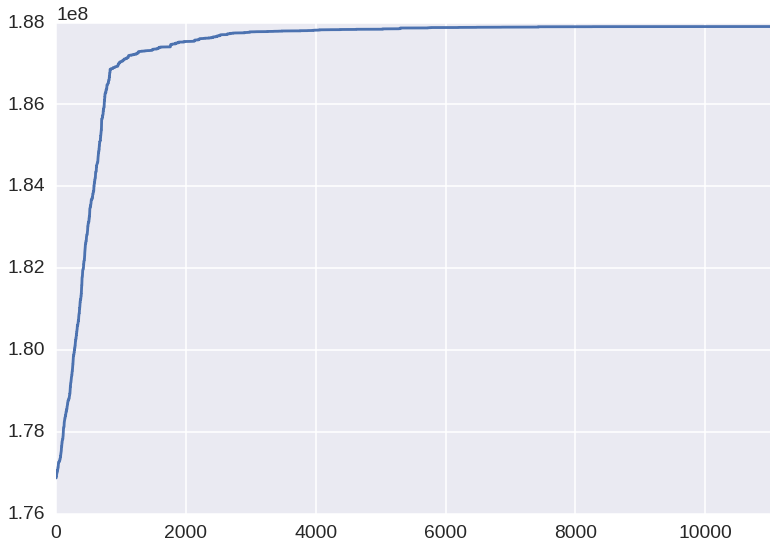

In [21]:
pd.Series(sa).plot()

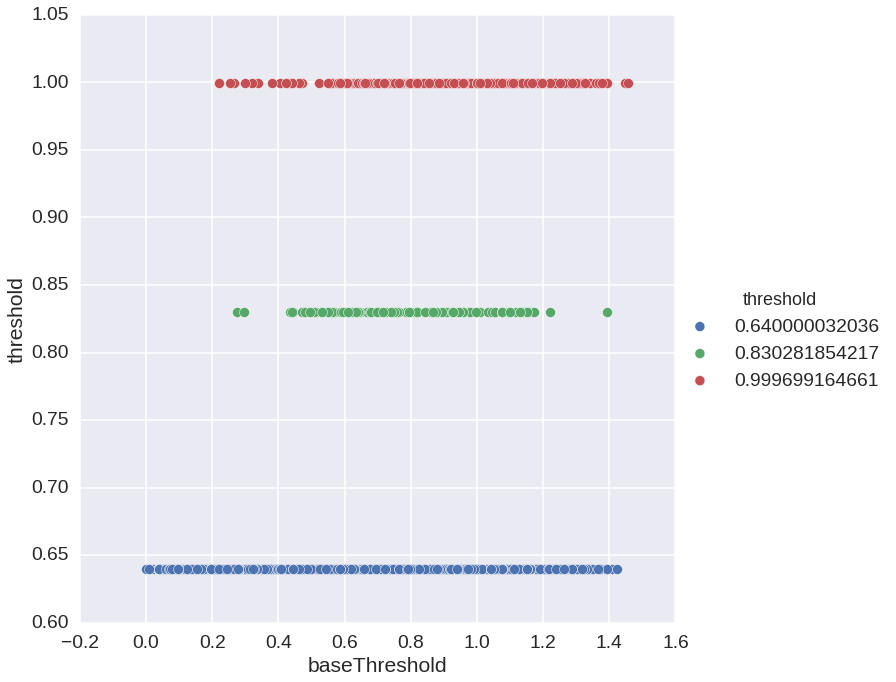

In [24]:
#markers = ['x','o','v','^','<']*2
sns.pairplot(x_vars=['baseThreshold'],y_vars=['threshold'],data=cepNew, hue='threshold',
             size=10,plot_kws={'s':100})

### Optimize schools in already existing groups
as if the old groups don't exist

In [25]:
sa, cepExist = simulated_annealing(cepExist, Tmax=1,deltaT=.01)

110052642.61
time in h 0.126163271136


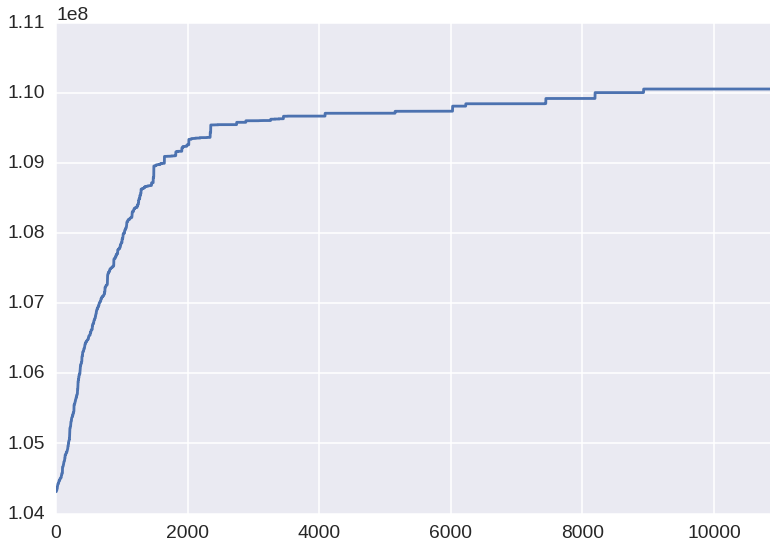

In [26]:
pd.Series(sa).plot()

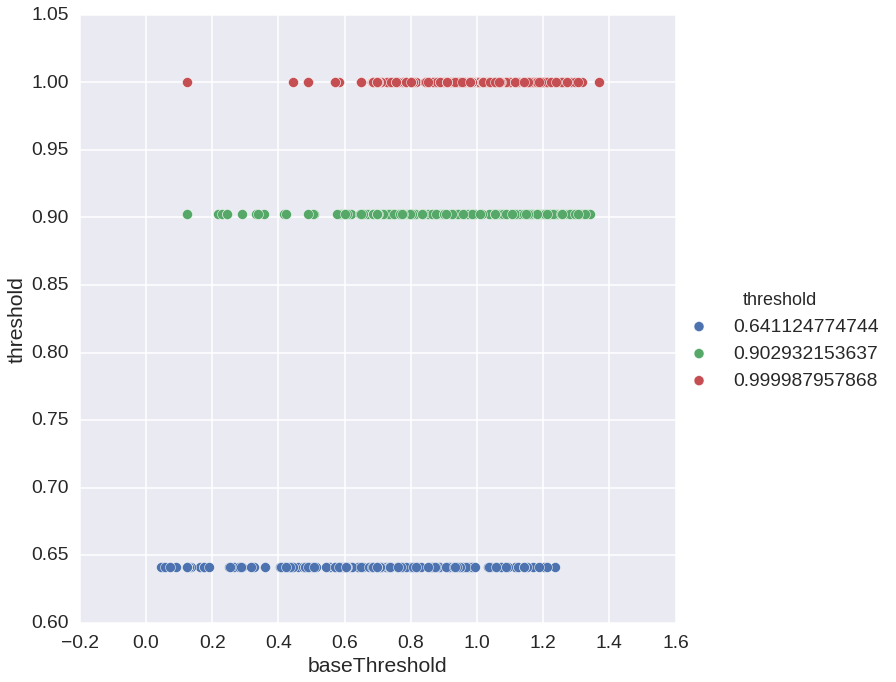

In [27]:
sns.pairplot(x_vars=['baseThreshold'],y_vars=['threshold'],data=cepExist, hue='threshold',
             size=10,plot_kws={'s':100})

### Optimize all schools

In [28]:
sa, cep = simulated_annealing(cep, Tmax=1,deltaT=.01)

300200293.28
time in h 0.123934786651


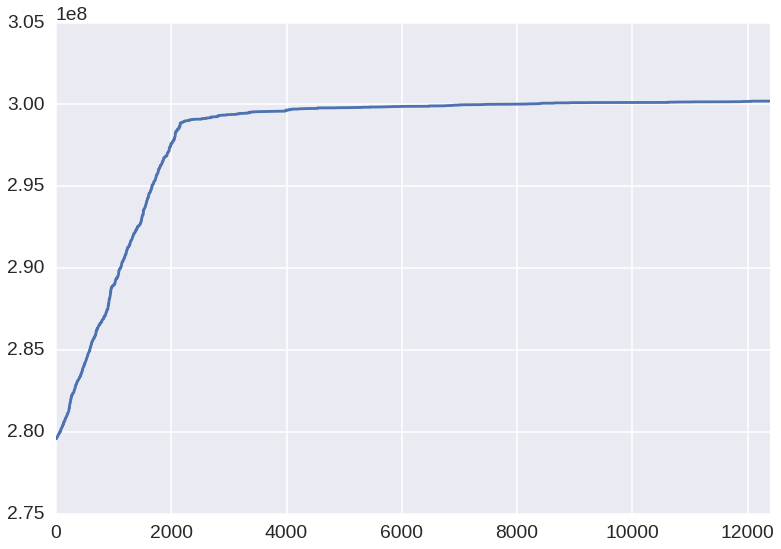

In [29]:
pd.Series(sa).plot()

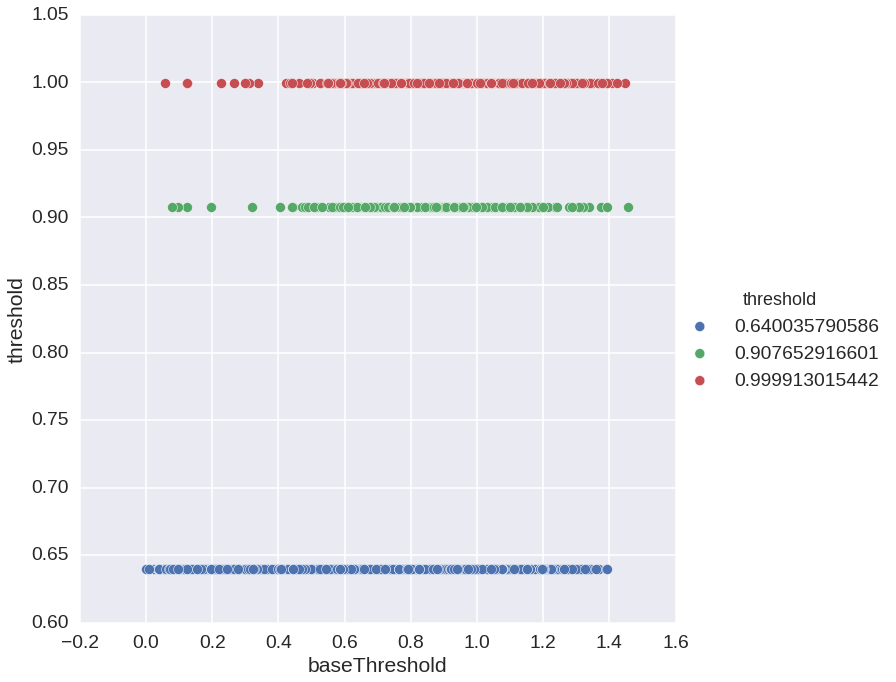

In [30]:
sns.pairplot(x_vars=['baseThreshold'],y_vars=['threshold'],data=cep, hue='threshold',
             size=10,plot_kws={'s':100})

In [ ]:
300-188-118

In [124]:
cepNew=sa_ensemble(cepNew,trials=10,Tmax=1,deltaT=.01)
print calcReimburse(cepNew)
cep = sa_ensemble(cep,trials=10,Tmax=1,deltaT=.01)
print calcReimburse(cep)


188201390.853
time in h 0.120875239438
187880659.415
time in h 0.121046219402
187958608.021
time in h 0.12066471027
187951429.923
time in h 0.119922322498
187876568.538
time in h 0.118843799962
188096405.744
time in h 0.118963785834
188389851.192
time in h 0.11899295032
188288074.065
time in h 0.119205963877
188176677.443
time in h 0.120157959196
188330964.405
time in h 0.120641188622
188389851.192
300494738.496
time in h 0.123460870253
300844655.244
time in h 0.122675254411
301217901.394
time in h 0.122311455276
300599771.561
time in h 0.122226397528
300700889.367
time in h 0.122146087819
300581457.468
time in h 0.122100576427
300652248.311
time in h 0.122229265836
300975356.473
time in h 0.122325822247
300331088.685
time in h 0.121758590341
301034296.423
time in h 0.121853065292
301217901.394


The old grouping reimbursement threhsolds yield higher reimbursements for the schools in most groups (except B), compared to optimizing groups based on todays parameters. 

This is a little misleading since even if reimbursement for those schools in these groups are lower, the total reimbursement for all schools may be higher.


In [31]:
cep['reimburse'] = cep['threshold']*cep['meal']
cep.groupby('oldGroup').sum()[['oldReimburse','reimburse']]

,oldReimburse,reimburse
oldGroup,,
A,6.017225e+07,5.337132e+07
B,4.016719e+06,4.366891e+06
C,8.053003e+05,7.124918e+05
D1,5.256260e+06,4.048482e+06
D2,5.353246e+05,4.626503e+05
D3,2.137252e+05,2.116858e+05
D4,1.921443e+06,1.633244e+06
D5,2.516527e+06,2.186497e+06
D6,3.049104e+05,3.035359e+05


Running 10 trials on the new schools to get a range of values. The error is on the order of 10^5. 

In [43]:
%%capture
trials=pd.DataFrame(columns=['final'])

for i in range(10):
    sa,cepNew=simulated_annealing(cepNew,Tmax=1,deltaT=.01)
    trials.loc[i,'final'] = sa[-1]
trials

,final
0,1.87875e+08
1,1.88242e+08
2,1.8807e+08
3,1.8834e+08
4,1.87849e+08
5,1.88376e+08
6,1.87846e+08
7,1.88376e+08
8,1.88239e+08
9,1.88388e+08


In [44]:
print trials.max()
print trials.min()
print trials.max()-trials.min()

final    1.883883e+08
dtype: float64
final    1.878461e+08
dtype: float64
final    542223.680099
dtype: float64


Running 10 trials on the *all* schools to get a range of values. The error is on the order of 10^5. 

In [49]:
%%capture
alltrials=pd.DataFrame(columns=['final'])

for i in range(10):
    sa,cep=simulated_annealing(cep,Tmax=1,deltaT=.01)
    alltrials.loc[i,'final'] = sa[-1]
alltrials

,final
0,3.00954e+08
1,3.00638e+08
2,3.00775e+08
3,3.00525e+08
4,3.00432e+08
5,3.00592e+08
6,3.0071e+08
7,3.00921e+08
8,3.00982e+08
9,3.00527e+08


In [51]:
print alltrials.max()
print alltrials.min()
print alltrials.max()-alltrials.min()

final    3.009816e+08
dtype: float64
final    3.004323e+08
dtype: float64
final    549311.902997
dtype: float64


### optimize within old groupings
Optimizing within each of the groups using current parameters always yeilds less reimbursement than using the old group thresholds. 

This is an inconclusive result, since optimizing with the larger group can still potentially yeild better results than the old thresholds.

In [46]:
%%capture

ind=pd.DataFrame(columns=['sa'])
grouped = cepExist.groupby('oldGroup')

for name,group in grouped:
    sa,group = simulated_annealing(group,Tmax=1,deltaT=.01)
    ind.loc[name,'sa'] = sa[-1]

ind['oldReimburse']=grouped.sum()[['oldReimburse']]
ind['diff'] = ind['sa'] - ind['oldReimburse']
ind

,sa,oldReimburse,diff
A,5.53133e+07,6.017225e+07,-4.85892e+06
B,0,4.016719e+06,-4.01672e+06
C,798214,8.053003e+05,-7085.86
D1,4.65953e+06,5.256260e+06,-596733
D2,445772,5.353246e+05,-89552.6
D3,0,2.137252e+05,-213725
D4,1.70739e+06,1.921443e+06,-214055
D5,2.2417e+06,2.516527e+06,-274830
D6,271923,3.049104e+05,-32987.7
F,3.91764e+07,4.208761e+07,-2.91123e+06


### full comparison
comparing each old group combined with the new schools compared to the new schools optimized by themselves plus the old reimbursement thresholds. 

In [47]:
#old
%%capture

combined = pd.DataFrame(columns=['comb'])
grouped = cepExist.groupby('oldGroup')

for name,group in grouped:
    df = pd.concat([group,cepNew],ignore_index=True)
    sa,df = simulated_annealing(df,Tmax=1,deltaT=.01)
    combined.loc[name,'comb'] = sa[-1]

combined['oldReimburse']=grouped.sum()[['oldReimburse']]
combined['diff'] = combined['comb'] - combined['oldReimburse'] - trials.mean()[0]
combined

,comb,oldReimburse,diff
A,2.44528e+08,6.017225e+07,-3.8047e+06
B,1.91357e+08,4.016719e+06,-820135
C,1.89168e+08,8.053003e+05,202248
D1,1.92892e+08,5.256260e+06,-524210
D2,1.89013e+08,5.353246e+05,317333
D3,1.88346e+08,2.137252e+05,-27926.2
D4,1.89937e+08,1.921443e+06,-144305
D5,1.9047e+08,2.516527e+06,-206404
D6,1.88503e+08,3.049104e+05,38440.6
F,2.30015e+08,4.208761e+07,-232985


In [126]:
#same as above, but using enseble method
%%capture

combined = pd.DataFrame(columns=['comb'])
grouped = cepExist.groupby('oldGroup')

for name,group in grouped:
    df = pd.concat([group,cepNew],ignore_index=True)
    df = sa_ensemble(df,Tmax=1,deltaT=.01)
    combined.loc[name,'comb'] = calcReimburse(df)

combined['oldReimburse']=grouped.sum()[['oldReimburse']]
combined['diff'] = combined['comb'] - combined['oldReimburse'] - calcReimburse(cepNew)
combined

,comb,oldReimburse,diff
A,2.45595e+08,6.017225e+07,-2.96686e+06
B,1.91508e+08,4.016719e+06,-898121
C,1.89237e+08,8.053003e+05,42161.3
D1,1.93429e+08,5.256260e+06,-216641
D2,1.89039e+08,5.353246e+05,113454
D3,1.88623e+08,2.137252e+05,19748.2
D4,1.90625e+08,1.921443e+06,314085
D5,1.90831e+08,2.516527e+06,-75195.4
D6,1.88787e+08,3.049104e+05,92320
F,2.30937e+08,4.208761e+07,459376


In [146]:
combined[abs(combined['diff'])<5*10**5]

,comb,oldReimburse,diff
C,1.89237e+08,8.053003e+05,42161.3
D1,1.93429e+08,5.256260e+06,-216641
D2,1.89039e+08,5.353246e+05,113454
D3,1.88623e+08,2.137252e+05,19748.2
D4,1.90625e+08,1.921443e+06,314085
D5,1.90831e+08,2.516527e+06,-75195.4
D6,1.88787e+08,3.049104e+05,92320
F,2.30937e+08,4.208761e+07,459376


In [55]:
#old
%%capture

allbutone = pd.DataFrame(columns=['comb'])
grouped = cep.groupby('oldGroup')

for name,group in grouped:
    df=cep.drop(group.index)
    sa,df = simulated_annealing(df,Tmax=1,deltaT=.01)
    allbutone.loc[name,'comb'] = sa[-1]

allbutone['oldReimburse']=grouped.sum()[['oldReimburse']]
allbutone['diff'] = allbutone['comb'] + allbutone['oldReimburse'] - alltrials.mean()[0]
allbutone

,comb,oldReimburse,diff
A,2.4236e+08,6.017225e+07,1.82666e+06
B,2.96829e+08,4.016719e+06,139877
C,3.00053e+08,8.053003e+05,152347
D1,2.95303e+08,5.256260e+06,-146908
D2,3.00397e+08,5.353246e+05,226752
D3,3.00474e+08,2.137252e+05,-17799.5
D4,2.98798e+08,1.921443e+06,13851.7
D5,2.98408e+08,2.516527e+06,218965
D6,3.00556e+08,3.049104e+05,154880
F,2.58273e+08,4.208761e+07,-344955


In [130]:
# using ensemble method
%%capture

allbutone = pd.DataFrame(columns=['comb'])
grouped = cep.groupby('oldGroup')

for name,group in grouped:
    df=cep.drop(group.index).copy()
    df = sa_ensemble(df,Tmax=1,deltaT=.01)
    allbutone.loc[name,'comb'] = calcReimburse(df)

allbutone['oldReimburse']=grouped.sum()[['oldReimburse']]
allbutone['diff'] = allbutone['comb'] + allbutone['oldReimburse'] - calcReimburse(cep)
allbutone

,comb,oldReimburse,diff
A,2.42596e+08,6.017225e+07,1.55081e+06
B,2.97436e+08,4.016719e+06,234593
C,3.00234e+08,8.053003e+05,-178582
D1,2.9599e+08,5.256260e+06,28256.2
D2,3.00738e+08,5.353246e+05,55453.6
D3,3.01164e+08,2.137252e+05,159871
D4,2.99461e+08,1.921443e+06,164857
D5,2.98495e+08,2.516527e+06,-206022
D6,3.00882e+08,3.049104e+05,-31063.5
F,2.58398e+08,4.208761e+07,-732523


In [147]:
allbutone[abs(allbutone['diff'])<5*10**5]

,comb,oldReimburse,diff
B,2.97436e+08,4.016719e+06,234593
C,3.00234e+08,8.053003e+05,-178582
D1,2.9599e+08,5.256260e+06,28256.2
D2,3.00738e+08,5.353246e+05,55453.6
D3,3.01164e+08,2.137252e+05,159871
D4,2.99461e+08,1.921443e+06,164857
D5,2.98495e+08,2.516527e+06,-206022
D6,3.00882e+08,3.049104e+05,-31063.5


In [132]:
#where the two differ
combined[combined['diff']*allbutone['diff']>0]

,comb,oldReimburse,diff
D2,1.89039e+08,5.353246e+05,113454
D3,1.88623e+08,2.137252e+05,19748.2
D4,1.90625e+08,1.921443e+06,314085
D5,1.90831e+08,2.516527e+06,-75195.4


In [136]:
cepExist.groupby('oldGroup').count()[['School']]

,School
oldGroup,
A,428
B,158
C,8
D1,27
D2,6
D3,6
D4,17
D5,29
D6,4


In [ ]:
drop

In [20]:
from itertools import product
# use itertools to list out all the possibilities 2^10
columns = cepExist.groupby('oldGroup').count().index
regroupings = pd.DataFrame(list(product(['yes','no'],repeat=10)),columns=columns)

In [26]:
for i in range(regroupings.shape[0]):
    df = cep.merge(regroupings.loc[i].to_frame('regroup'),how='left',
                   left_on='oldGroup',right_index=True)

    #calculate based on groups
    cepRegroup = df[df.regroup!='no'].copy()
    cepOldgroup = df[df.regroup=='no'].copy()

    results,cepRegroup = simulated_annealing(cepRegroup,Tmax=1,deltaT=.1)
    totalR = results[-1]+cepOldgroup['oldReimburse'].sum()
    regroupings.loc[i,'reimburse']=totalR

KeyboardInterrupt: 

In [29]:
regroupings.reimburse.count()

111

In [45]:
regroupings

oldGroup,A,B,C,D1,D2,D3,D4,D5,D6,F,reimburse
0,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,2.951615e+08
1,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,2.948609e+08
2,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,2.951668e+08
3,yes,yes,yes,yes,yes,yes,yes,yes,no,no,2.958426e+08
4,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,2.953677e+08
5,yes,yes,yes,yes,yes,yes,yes,no,yes,no,2.949626e+08
6,yes,yes,yes,yes,yes,yes,yes,no,no,yes,2.962628e+08
7,yes,yes,yes,yes,yes,yes,yes,no,no,no,2.944353e+08
8,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,2.944328e+08
9,yes,yes,yes,yes,yes,yes,no,yes,yes,no,2.945084e+08
